# Read Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaseidgar","key":"83cdc65278196383418f433e4ab0d88e"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c llm-detect-ai-generated-text

  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 41.6MB/s]


In [ ]:
!ls

kaggle.json  llm-detect-ai-generated-text.zip  sample_data


In [ ]:
!unzip '/content/llm-detect-ai-generated-text.zip' -d '/content/'

Archive:  /content/llm-detect-ai-generated-text.zip
  inflating: /content/sample_submission.csv  
  inflating: /content/test_essays.csv  
  inflating: /content/train_essays.csv  
  inflating: /content/train_prompts.csv  


In [ ]:
DATA_DIR = '/content/'

In [ ]:
df_train_prompts = pd.read_csv(DATA_DIR + "train_prompts.csv")
print(df_train_prompts.info())
df_train_prompts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes
None


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
df_train_essays = pd.read_csv(DATA_DIR + "train_essays.csv")
print(df_train_essays.info())
df_train_essays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


Text(0.5, 1.0, 'Distribution of Generated Text')

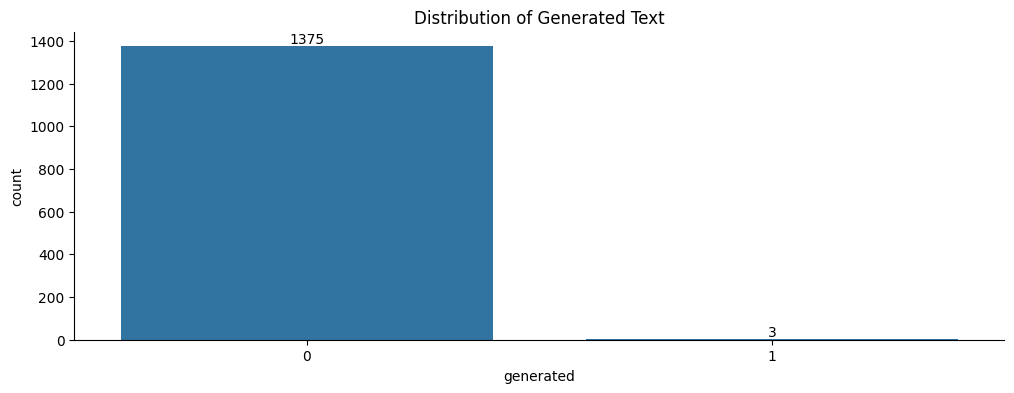

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="generated")

abs_values = df_train_essays['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [ ]:
print('Total number of news: {}'.format(len(df_train_essays)))
print(40*'-')
print('Split by category:')
print(df_train_essays["generated"].value_counts())
print(40*'-')
nr_categories = len(df_train_essays["generated"].unique())
print("Number of categories: {n}".format(n=nr_categories))


Total number of news: 1378
----------------------------------------
Split by category:
0    1375
1       3
Name: generated, dtype: int64
----------------------------------------
Number of categories: 2


# add new data

In [ ]:
!kaggle datasets download -d thedrcat/daigt-v2-train-dataset

 98% 28.0M/28.5M [00:00<00:00, 74.4MB/s]
100% 28.5M/28.5M [00:00<00:00, 64.6MB/s]


In [ ]:
!ls

daigt-v2-train-dataset.zip	  sample_data		 train_essays.csv
kaggle.json			  sample_submission.csv  train_prompts.csv
llm-detect-ai-generated-text.zip  test_essays.csv


In [ ]:
!unzip '/content/daigt-v2-train-dataset.zip' -d '/content/'

Archive:  /content/daigt-v2-train-dataset.zip
  inflating: /content/train_v2_drcat_02.csv  


In [ ]:
df_train_essays_ext = pd.read_csv(DATA_DIR + "train_v2_drcat_02.csv")
df_train_essays_ext.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [ ]:
df_train_essays_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
# prompt: rename "label" column of df_train_essays_ext to "generated"

df_train_essays_ext.rename(columns={'label': 'generated'}, inplace=True)

In [ ]:
df_train_essays_ext.head()

,text,generated,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


Text(0.5, 1.0, 'Distribution of Generated Text')

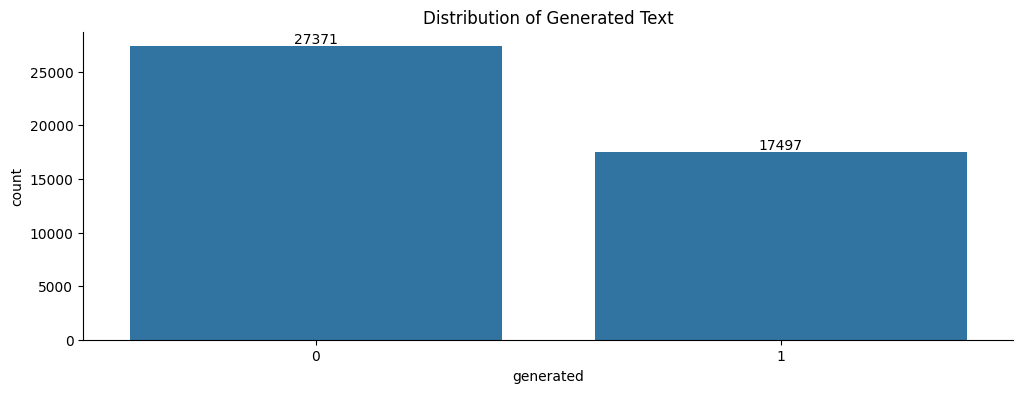

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_ext,
                   x="generated")

abs_values = df_train_essays_ext['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [ ]:
# Assuming df_train_essays_ext is your DataFrame
selected_samples = df_train_essays_ext[df_train_essays_ext['generated'] == 1].sample(n=1372, random_state=42)

# Now, selected_samples contains the randomly selected 1372 samples where 'generated' is 1
selected_samples.head()

,text,generated,prompt_name,source,RDizzl3_seven
36485,Companies often have a set of criteria they l...,1,Seeking multiple opinions,mistral7binstruct_v2,False
33164,I think that meditation and mindfulness practi...,1,Distance learning,llama_70b_v1,False
26243,"[Your Name]\n[Your Address]\n[Your City, State...",1,Cell phones at school,falcon_180b_v1,False
35871,Japan is an incredible country with a rich cul...,1,Distance learning,chat_gpt_moth,False
40809,Limiting car usage has numerous advantages t...,1,Car-free cities,NousResearch/Llama-2-7b-chat-hf,True


In [ ]:
selected_samples['generated'].sum()

1372

In [ ]:
df_train_essays_final = pd.concat([selected_samples[["text", "generated"]], df_train_essays[["text", "generated"]]])

df_train_essays_final.head()

,text,generated
36485,Companies often have a set of criteria they l...,1
33164,I think that meditation and mindfulness practi...,1
26243,"[Your Name]\n[Your Address]\n[Your City, State...",1
35871,Japan is an incredible country with a rich cul...,1
40809,Limiting car usage has numerous advantages t...,1


In [ ]:
df_train_essays_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 36485 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2750 non-null   object
 1   generated  2750 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.5+ KB


Text(0.5, 1.0, 'Distribution of Generated Text')

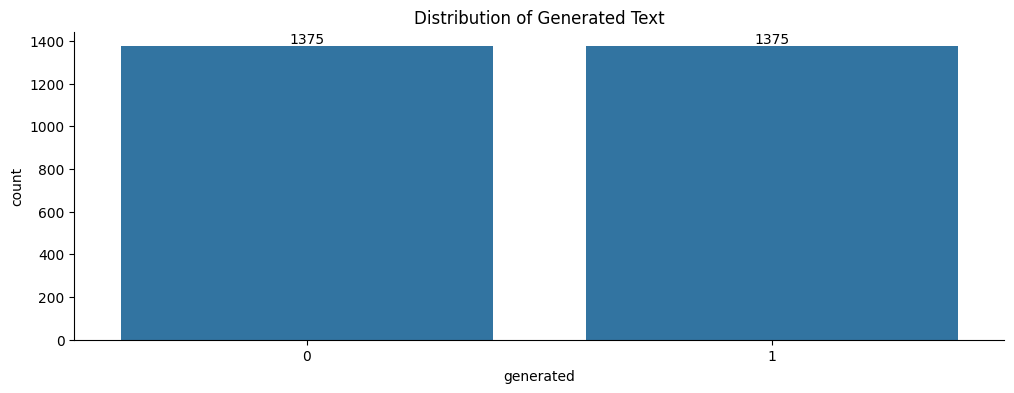

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_final,
                   x="generated")

abs_values = df_train_essays_final['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

# Path failed

## preproccessing

In [ ]:
df_train_essays_final.head()

,text,generated
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'The I like surfboarding!'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10,
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tensor([[  101,  1109,   146,  1176, 20114, 24631,   106,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])


In [ ]:
example_text = tokenizer.decode(bert_input['input_ids'][0])
print(example_text)

[CLS] The I like surfboarding! [SEP] [PAD] [PAD]


In [ ]:
df_train_essays_final

,text,generated
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
1373,There has been a fuss about the Elector Colleg...,0
1374,Limiting car usage has many advantages. Such a...,0
1375,There's a new trend that has been developing f...,0
1376,As we all know cars are a big part of our soci...,0


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Define a function to check if a text has more than 512 tokens
def has_more_than_512_tokens(text):
    # Tokenize the text without padding or truncation
    tokens = tokenizer.tokenize(text)
    return len(tokens) > 512

# Apply the function to your DataFrame
df_train_essays_final['has_more_than_512_tokens'] = df_train_essays_final['text'].apply(has_more_than_512_tokens)

# Print rows where the text has more than 512 tokens
df_train_essays_final[df_train_essays_final['has_more_than_512_tokens']]

,text,generated,has_more_than_512_tokens
5,Cell phone use should not be legal while drivi...,0,True
6,Phones and Driving\n\nDriving is a good way to...,0,True
7,PHONES AND DRIVING\n\nIn this world in which w...,0,True
8,People are debating whether if drivers should ...,0,True
13,Operating a motor vehicle while on your cell p...,0,True
...,...,...,...
1372,studies have shown that passenger cars are res...,0,True
1373,There has been a fuss about the Elector Colleg...,0,True
1375,There's a new trend that has been developing f...,0,True
1376,As we all know cars are a big part of our soci...,0,True


In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Define labels mapping generated column to numeric IDs
labels = {'0': 0, '1': 1}  # Assuming 'generated' column has values 0 or 1

In [ ]:
# Preprocess your dataset
def preprocess_dataset(df):
    # Map 'generated' labels to numeric IDs for each entry in the dataframe
    labels_list = [labels[str(label)] for label in df['generated']]

    # Tokenize and format the 'text' column using the BERT tokenizer
    texts_list = [tokenizer(
        text,
        padding='max_length',
        max_length=512,
        truncation=True,
        return_tensors="pt"
    ) for text in df['text']]

    return labels_list, texts_list

In [ ]:
# Assuming df_train_essays_final is your DataFrame
labels_list, texts_list = preprocess_dataset(df_train_essays_final)

In [ ]:
for idx, text_tensor in enumerate(texts_list):
    input_ids = text_tensor['input_ids'][0]  # Extract input_ids tensor
    if len(input_ids) > 512:
        print(f"Text at index {idx} has more than 512 tokens.")

## Data Class

In [ ]:
# Define a Dataset class for your dataset
class EssaysDataset(torch.utils.data.Dataset):

    def __init__(self, labels, texts):
        self.labels = labels
        self.texts = texts

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(texts_list, labels_list, test_size=0.2, random_state=42,stratify=labels_list)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

# Create DataFrames from the splits
df_train = pd.DataFrame({'text': X_train, 'label': y_train})
df_val = pd.DataFrame({'text': X_val, 'label': y_val})
df_test = pd.DataFrame({'text': X_test, 'label': y_test})

# Display the lengths of the splits
print(len(df_train), len(df_val), len(df_test))


36996 4625 4625


In [ ]:
train_dataset = EssaysDataset(labels=df_train['label'].tolist(), texts=df_train['text'].tolist())
val_dataset = EssaysDataset(labels=df_val['label'].tolist(), texts=df_val['text'].tolist())
test_dataset = EssaysDataset(labels=df_test['label'].tolist(), texts=df_test['text'].tolist())

## Model Building

In [ ]:
import torch
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5, output_size=2):  # Adjust output_size to match your number of labels

        super(BertClassifier, self).__init__()

        # Load pre-trained BERT model
        self.bert = BertModel.from_pretrained('bert-base-cased')

        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(dropout)

        # Linear layer for classification
        self.linear = nn.Linear(768, output_size)  # Adjust output_size here
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        # Get the embeddings from BERT model
        _, pooled_output = self.bert(input_ids=input_id, attention_mask=mask, return_dict=False)

        # Apply dropout to prevent overfitting
        dropout_output = self.dropout(pooled_output)

        # Pass the output through a linear layer and apply ReLU activation
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer


## Training Loop

In [ ]:
# Import necessary libraries
from torch.optim import Adam
from tqdm import tqdm

# Define a function to train the model
def train(model, train_data, val_data, learning_rate, epochs):


    # Create PyTorch DataLoader for training and validation datasets
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=2)

    # Check if GPU (cuda) is available, and set device accordingly
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # Define the loss function (categorical cross entropy) and optimizer (Adam)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    # If using GPU, move the model and criterion to GPU
    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    # Iterate over the specified number of epochs
    for epoch_num in range(epochs):

        # Initialize training metrics
        total_acc_train = 0
        total_loss_train = 0

        # Iterate over batches in the training dataset
        for train_input, train_label in tqdm(train_dataloader):

            # Move input and label tensors to the specified device (GPU or CPU)
            train_label = train_label.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            # Forward pass: compute predicted outputs by passing inputs to the model
            output = model(input_id, mask)

            # Calculate the batch loss
            batch_loss = criterion(output, train_label.long())
            total_loss_train += batch_loss.item()

            # Calculate the batch accuracy
            acc = (output.argmax(dim=1) == train_label).sum().item()
            total_acc_train += acc

            # Backward pass: compute gradient of the loss with respect to model parameters
            model.zero_grad()
            batch_loss.backward()

            # Perform a single optimization step (parameter update)
            optimizer.step()

        # Initialize validation metrics
        total_acc_val = 0
        total_loss_val = 0

        # Disable gradient calculation during validation
        with torch.no_grad():

            # Iterate over batches in the validation dataset
            for val_input, val_label in val_dataloader:

                # Move input and label tensors to the specified device
                val_label = val_label.to(device)
                mask = val_input['attention_mask'].to(device)
                input_id = val_input['input_ids'].squeeze(1).to(device)

                # Forward pass: compute predicted outputs by passing inputs to the model
                output = model(input_id, mask)

                # Calculate the batch loss for validation
                batch_loss = criterion(output, val_label.long())
                total_loss_val += batch_loss.item()

                # Calculate the batch accuracy for validation
                acc = (output.argmax(dim=1) == val_label).sum().item()
                total_acc_val += acc

        # Print and log the training and validation metrics for each epoch
        print(
            f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
            | Train Accuracy: {total_acc_train / len(train_data): .3f} \
            | Val Loss: {total_loss_val / len(val_data): .3f} \
            | Val Accuracy: {total_acc_val / len(val_data): .3f}')

# Set the number of epochs, create the model, and set the learning rate
EPOCHS = 5
model = BertClassifier()
LR = 1e-6

# Call the train function with the specified parameters
train(model, train_dataset, val_dataset, LR, EPOCHS)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

 13%|█▎        | 2459/18498 [7:10:49<46:50:08, 10.51s/it]


KeyboardInterrupt: 

# Another path

## preproccessing

In [ ]:
df_train_essays_final.head()

,text,generated
36485,Companies often have a set of criteria they l...,1
33164,I think that meditation and mindfulness practi...,1
26243,"[Your Name]\n[Your Address]\n[Your City, State...",1
35871,Japan is an incredible country with a rich cul...,1
40809,Limiting car usage has numerous advantages t...,1


In [ ]:
print('Total number of news: {}'.format(len(df_train_essays_final)))
print(40*'-')
print('Split by category:')
print(df_train_essays_final["generated"].value_counts())
print(40*'-')
nr_categories = len(df_train_essays_final["generated"].unique())
print("Number of categories: {n}".format(n=nr_categories))


Total number of news: 2750
----------------------------------------
Split by category:
1    1375
0    1375
Name: generated, dtype: int64
----------------------------------------
Number of categories: 2


In [ ]:
# Renaming, Input -> X, Output -> y
X = df_train_essays_final['text']
y=np.unique(df_train_essays_final['generated'], return_inverse=True)[1]
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
# distilBERT tokenizer
import transformers
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
import torch
from sklearn.model_selection import train_test_split
X_list = X.to_list()
X_pt = tokenizer(X_list, padding='max_length', max_length=512, truncation=True, return_tensors='pt')["input_ids"]

y_list = y.tolist()
y_pt = torch.Tensor(y_list).long()

# Split the dataset into training and test data
X_pt_train, X_pt_test, y_pt_train, y_pt_test = train_test_split(X_pt, y_pt, test_size=0.3, random_state=42, stratify=y_pt)


In [ ]:
from torch.utils.data import Dataset, DataLoader
class EssaysDataset(Dataset):
    """Custom-built BBC News dataset"""

    def __init__(self, X, y):
        self.X_train = X
        self.y_train = y

    def __len__(self):
        return len(self.y_train)

    def __getitem__(self, idx):
        return self.X_train[idx], self.y_train[idx]

In [ ]:
train_data_pt = EssaysDataset(X=X_pt_train, y=y_pt_train)
test_data_pt = EssaysDataset(X=X_pt_test, y=y_pt_test)

In [ ]:
# Embed the datasets into a dataloader
train_loader_pt = DataLoader(train_data_pt, batch_size=32)
test_loader_pt = DataLoader(test_data_pt, batch_size=32)

## Model Building

In [ ]:
from transformers import DistilBertConfig, DistilBertModel

In [ ]:
config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
dbert_pt = DistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
import torch.nn as nn

class DistilBertClassification(nn.Module):
    def __init__(self):
        super(DistilBertClassification, self).__init__()
        self.dbert = dbert_pt
        self.dropout = nn.Dropout(p=0.2)
        # self.linear1 = nn.Linear(768, 64)
        # self.ReLu = nn.ReLU()
        # self.linear2 = nn.Linear(64, 2)
        self.linear = nn.Linear(768, 2)

    def forward(self, input_ids):
        outputs = self.dbert(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state[:, 0, :]
        x = self.dropout(last_hidden_state)
        logits = self.linear(x)
        return logits
    # def forward(self, x):
    #     x = self.dbert(input_ids=x)
    #     x = x["last_hidden_state"][:, 0, :]
    #     x = self.dropout(x)
    #     x = self.linear1(x)
    #     x = self.ReLu(x)
    #     logits = self.linear2(x)
    #     return logits

In [ ]:
model_pt = DistilBertClassification().to(device)

for param in model_pt.dbert.parameters():
    param.requires_grad = False

total_params = sum(p.numel() for p in model_pt.parameters())
total_params_trainable = sum(p.numel() for p in model_pt.parameters() if p.requires_grad)
print("Number of parameters: ", total_params)
print("Number of trainable parameters: ", total_params_trainable)

Number of parameters:  66364418
Number of trainable parameters:  1538


## Training loop

100%|██████████| 61/61 [46:33<00:00, 45.80s/it]


Epoch 1 		 Training Loss:      0.369 		 Validation Loss:      0.202
		 Training Accuracy:    86.857% 		 Validation Accuracy:    93.697%


100%|██████████| 61/61 [46:01<00:00, 45.28s/it]


Epoch 2 		 Training Loss:      0.189 		 Validation Loss:      0.141
		 Training Accuracy:    93.922% 		 Validation Accuracy:    96.606%


100%|██████████| 61/61 [45:10<00:00, 44.43s/it]


Epoch 3 		 Training Loss:      0.148 		 Validation Loss:      0.118
		 Training Accuracy:    95.429% 		 Validation Accuracy:    97.455%


100%|██████████| 61/61 [44:49<00:00, 44.09s/it]


Epoch 4 		 Training Loss:      0.120 		 Validation Loss:      0.104
		 Training Accuracy:    96.468% 		 Validation Accuracy:    97.455%


100%|██████████| 61/61 [46:04<00:00, 45.32s/it]


Epoch 5 		 Training Loss:      0.107 		 Validation Loss:      0.107
		 Training Accuracy:    97.143% 		 Validation Accuracy:    97.455%


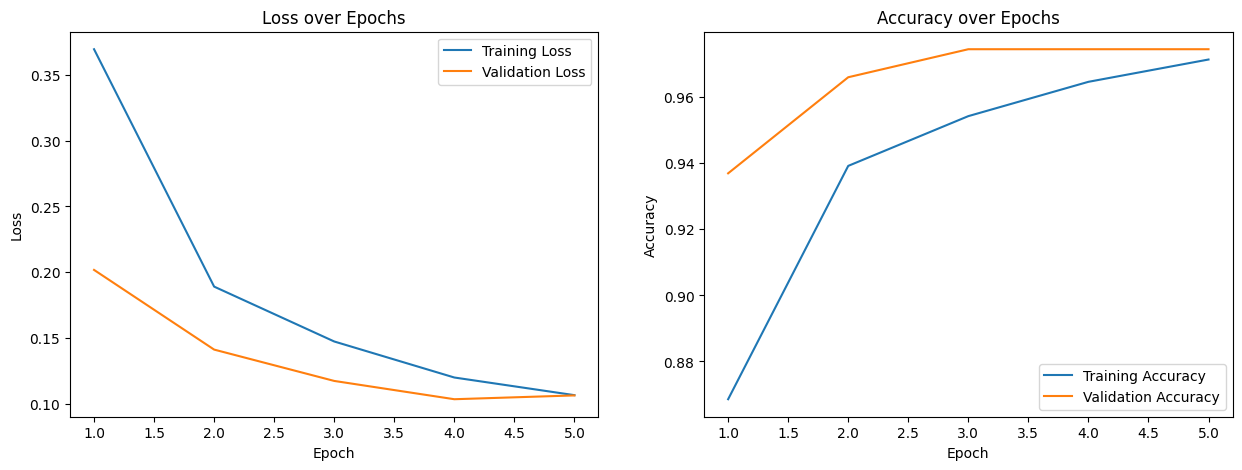

Training time: 18639.371959


In [ ]:
from datetime import datetime

epochs = 5
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_pt.parameters())

from tqdm import tqdm
history = {}
history["epoch"] = []
history["train_loss"] = []
history["valid_loss"] = []
history["train_accuracy"] = []
history["valid_accuracy"] = []

start_time = datetime.now()

for e in range(epochs):
    model_pt.train()
    train_loss = 0.0
    train_accuracy = []

    for X, y in tqdm(train_loader_pt):
        prediction = model_pt(X)
        loss = criterion(prediction, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        prediction_index = prediction.argmax(axis=1)
        accuracy = (prediction_index == y)
        train_accuracy += accuracy

    train_accuracy = (sum(train_accuracy) / len(train_accuracy)).item()

    model_pt.eval()
    valid_loss = 0.0
    valid_accuracy = []

    for X, y in test_loader_pt:
        prediction = model_pt(X)
        loss = criterion(prediction, y)

        valid_loss += loss.item()

        prediction_index = prediction.argmax(axis=1)
        accuracy = (prediction_index == y)
        valid_accuracy += accuracy

    valid_accuracy = (sum(valid_accuracy) / len(valid_accuracy)).item()

    history["epoch"].append(e + 1)
    history["train_loss"].append(train_loss / len(train_loader_pt))
    history["valid_loss"].append(valid_loss / len(test_loader_pt))
    history["train_accuracy"].append(train_accuracy)
    history["valid_accuracy"].append(valid_accuracy)

    print(f'Epoch {e + 1} \t\t Training Loss: {train_loss / len(train_loader_pt):10.3f} \t\t Validation Loss: {valid_loss / len(test_loader_pt):10.3f}')
    print(f'\t\t Training Accuracy: {train_accuracy :10.3%} \t\t Validation Accuracy: {valid_accuracy :10.3%}')

end_time = datetime.now()
training_time_pt = (end_time - start_time).total_seconds()

from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title="Loss over Epochs", xlabel="Epoch", ylabel="Loss")
ax[0].plot(history["epoch"], history["train_loss"], label="Training Loss")
ax[0].plot(history["epoch"], history["valid_loss"], label="Validation Loss")
ax[0].legend()

ax[1].set(title="Accuracy over Epochs", xlabel="Epoch", ylabel="Accuracy")
ax[1].plot(history["epoch"], history["train_accuracy"], label="Training Accuracy")
ax[1].plot(history["epoch"], history["valid_accuracy"], label="Validation Accuracy")
ax[1].legend()

plt.show()
print("Training time:", training_time_pt)

# non-neural network

## preprocessing

In [ ]:
df_train_essays_final.head()

,text,generated
36485,Companies often have a set of criteria they l...,1
33164,I think that meditation and mindfulness practi...,1
26243,"[Your Name]\n[Your Address]\n[Your City, State...",1
35871,Japan is an incredible country with a rich cul...,1
40809,Limiting car usage has numerous advantages t...,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_train_essays_final['text']
y = np.unique(df_train_essays_final['generated'], return_inverse=True)[1]

In [ ]:
X.head()

36485     Companies often have a set of criteria they l...
33164    I think that meditation and mindfulness practi...
26243    [Your Name]\n[Your Address]\n[Your City, State...
35871    Japan is an incredible country with a rich cul...
40809      Limiting car usage has numerous advantages t...
Name: text, dtype: object

In [ ]:
y[:5]

array([1, 1, 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        tokens = self.tokenizer(text, padding='max_length', max_length=512, truncation=True, return_tensors='pt')['input_ids']

        return {'input_ids': tokens, 'label': label}


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_dataset = MyDataset(X_train.tolist(), y_train, tokenizer)
test_dataset = MyDataset(X_test.tolist(), y_test, tokenizer)

In [ ]:
dbert = DistilBertModel.from_pretrained('distilbert-base-uncased')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
len(X_train)

1925

In [ ]:
len(train_loader)

16

In [ ]:
train_embeddings = []
train_labels = []

# Iterate over batches
with torch.no_grad():
    for batch in train_loader:
        input_ids = batch['input_ids']
        labels = batch['label']

        input_ids = input_ids.squeeze(dim=1)

        # Get embeddings for the batch
        outputs = dbert(input_ids)
        last_hidden_state = outputs.last_hidden_state[:, 0, :].numpy()

        train_embeddings.append(last_hidden_state)
        train_labels.append(labels)

# Concatenate embeddings and labels
train_embeddings = np.concatenate(train_embeddings, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [ ]:
test_embeddings = []
test_labels = []

# Iterate over batches
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        labels = batch['label']

        input_ids = input_ids.squeeze(dim=1)

        # Get embeddings for the batch
        outputs = dbert(input_ids)
        last_hidden_state = outputs.last_hidden_state[:, 0, :].numpy()

        test_embeddings.append(last_hidden_state)
        test_labels.append(labels)

# Concatenate embeddings and labels
test_embeddings = np.concatenate(test_embeddings, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

## Build and evaluate models

In [ ]:
# Use embeddings as features for Logistic Regression
logreg_model = make_pipeline(LogisticRegression())
logreg_model.fit(train_embeddings, train_labels)
# Make predictions
logreg_predictions = logreg_model.predict(test_embeddings)
# Evaluate models
logreg_accuracy = accuracy_score(test_labels, logreg_predictions)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')

Logistic Regression Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Use embeddings as features for SVM
svm_model = make_pipeline(SVC())
svm_model.fit(train_embeddings, train_labels)
svm_predictions = svm_model.predict(test_embeddings)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

SVM Accuracy: 0.99


In [ ]:
# K-Nearest Neighbours
knn_model = KNeighborsClassifier()
knn_model.fit(train_embeddings, train_labels)
knn_predictions = knn_model.predict(test_embeddings)
knn_accuracy = accuracy_score(test_labels, knn_predictions)
print(f'K-Nearest Neighbours Accuracy: {knn_accuracy:.2f}')

K-Nearest Neighbours Accuracy: 0.99


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(train_embeddings, train_labels)
dt_predictions = dt_model.predict(test_embeddings)
dt_accuracy = accuracy_score(test_labels, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')

Decision Tree Accuracy: 0.96


In [ ]:
# Bagging Decision Tree
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
bagging_model.fit(train_embeddings, train_labels)
bagging_predictions = bagging_model.predict(test_embeddings)
bagging_accuracy = accuracy_score(test_labels, bagging_predictions)
print(f'Bagging Decision Tree Accuracy: {bagging_accuracy:.2f}')

Bagging Decision Tree Accuracy: 0.99


In [ ]:
# Boosted Decision Tree
boosting_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
boosting_model.fit(train_embeddings, train_labels)
boosting_predictions = boosting_model.predict(test_embeddings)
boosting_accuracy = accuracy_score(test_labels, boosting_predictions)
print(f'Boosted Decision Tree Accuracy: {boosting_accuracy:.2f}')

Boosted Decision Tree Accuracy: 0.96


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(train_embeddings, train_labels)
rf_predictions = rf_model.predict(test_embeddings)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Random Forest Accuracy: 1.00


In [ ]:
# Logistic Regression
logreg_model = make_pipeline(StandardScaler(), LogisticRegression())

# Support Vector Machine
svm_model = make_pipeline(StandardScaler(), SVC())

# Decision Tree
tree_model = DecisionTreeClassifier()

# Bagging Decision Tree
bagging_tree_model = BaggingClassifier(estimator=tree_model, n_estimators=50)

# Ensemble model (Voting Classifier with Bagging)
voting_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('svm', svm_model),
    ('bagging_tree', bagging_tree_model)
], voting='hard')

# Train and evaluate the ensemble model
voting_model.fit(train_embeddings, train_labels)
voting_predictions = voting_model.predict(test_embeddings)
voting_accuracy = accuracy_score(test_labels, voting_predictions)
print(f'Voting Classification Accuracy: {voting_accuracy:.2f}')

Voting Classification Accuracy: 1.00


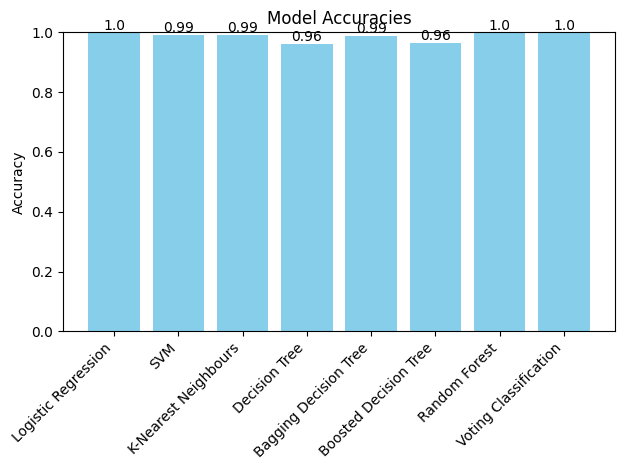

In [ ]:
# List of model names
models = [
    'Logistic Regression',
    'SVM',
    'K-Nearest Neighbours',
    'Decision Tree',
    'Bagging Decision Tree',
    'Boosted Decision Tree',
    'Random Forest',
    'Voting Classification'
]

# List of corresponding accuracies
accuracies = [
    logreg_accuracy,
    svm_accuracy,
    knn_accuracy,
    dt_accuracy,
    bagging_accuracy,
    boosting_accuracy,
    rf_accuracy,
    voting_accuracy
]

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color='skyblue')

# Add labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')
ax.set_ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy percentage

# Add value annotations on each bar
for bar, acc in zip(bars, accuracies):
    yval = acc
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression (Scaled) ROC-AUC: 1.00


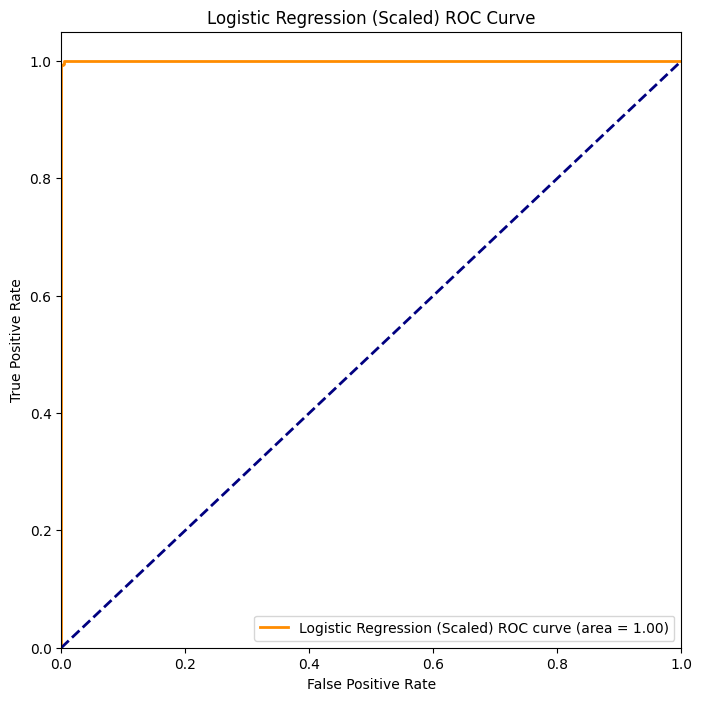

In [ ]:
# Logistic Regression (scaled)
logreg_scaled_model = make_pipeline(StandardScaler(), LogisticRegression())
logreg_scaled_model.fit(train_embeddings, train_labels)  # Fit on training data

logreg_scaled_pred_proba = logreg_scaled_model.predict_proba(test_embeddings)[:, 1]
roc_auc_logreg_scaled = roc_auc_score(test_labels, logreg_scaled_pred_proba)
print(f'Logistic Regression (Scaled) ROC-AUC: {roc_auc_logreg_scaled:.2f}')
plot_roc_auc(test_labels, logreg_scaled_pred_proba, 'Logistic Regression (Scaled)')

SVM (Scaled) ROC-AUC: 1.00


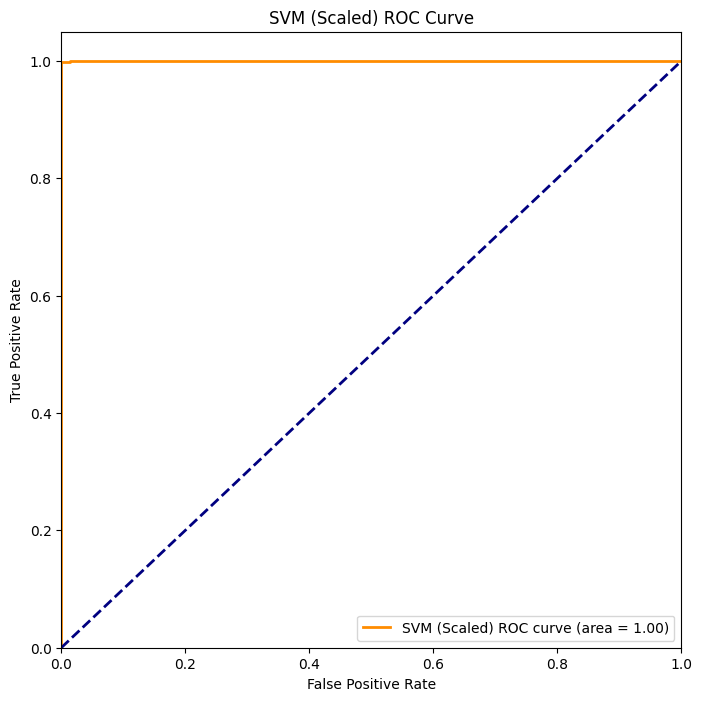

In [ ]:
# SVM (scaled)
svm_scaled_model = make_pipeline(StandardScaler(), SVC(probability=True))
svm_scaled_model.fit(train_embeddings, train_labels)  # Fit on training data

svm_scaled_pred_proba = svm_scaled_model.predict_proba(test_embeddings)[:, 1]
roc_auc_svm_scaled = roc_auc_score(test_labels, svm_scaled_pred_proba)
print(f'SVM (Scaled) ROC-AUC: {roc_auc_svm_scaled:.2f}')
plot_roc_auc(test_labels, svm_scaled_pred_proba, 'SVM (Scaled)')


K-Nearest Neighbours ROC-AUC: 1.00


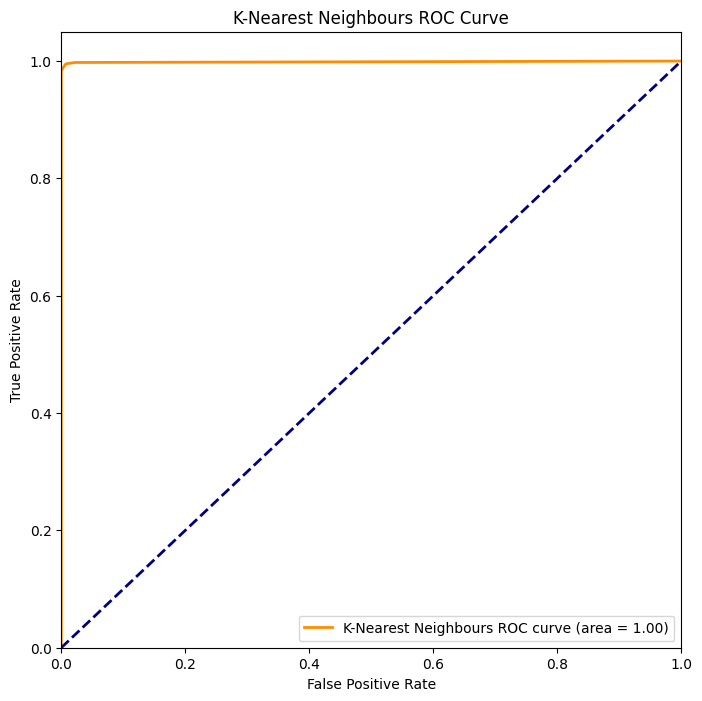

In [ ]:
# K-Nearest Neighbours
knn_pred_proba = knn_model.predict_proba(test_embeddings)[:, 1]
roc_auc_knn = roc_auc_score(test_labels, knn_pred_proba)
print(f'K-Nearest Neighbours ROC-AUC: {roc_auc_knn:.2f}')
plot_roc_auc(test_labels, knn_pred_proba, 'K-Nearest Neighbours')

Decision Tree ROC-AUC: 0.96


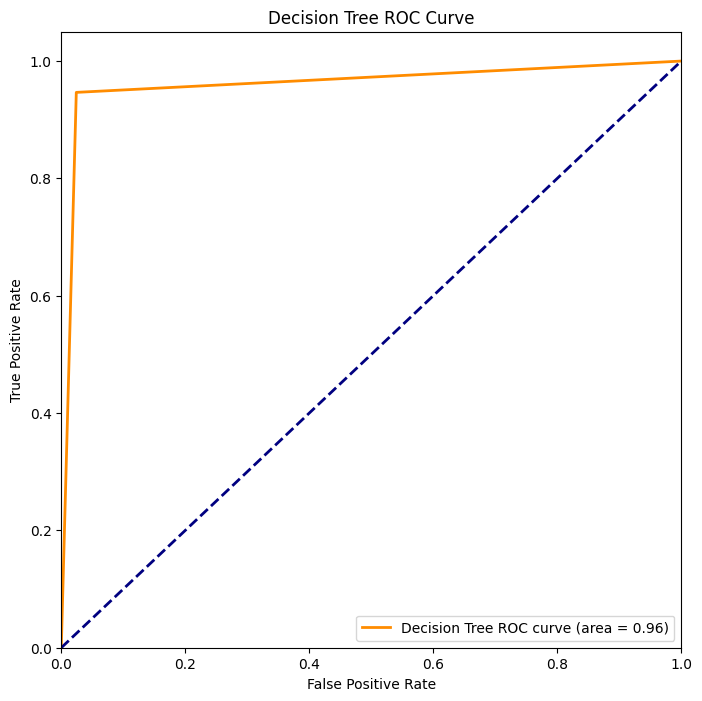

In [ ]:
# Decision Tree
dt_pred_proba = dt_model.predict_proba(test_embeddings)[:, 1]
roc_auc_dt = roc_auc_score(test_labels, dt_pred_proba)
print(f'Decision Tree ROC-AUC: {roc_auc_dt:.2f}')
plot_roc_auc(test_labels, dt_pred_proba, 'Decision Tree')

Bagging Decision Tree ROC-AUC: 1.00


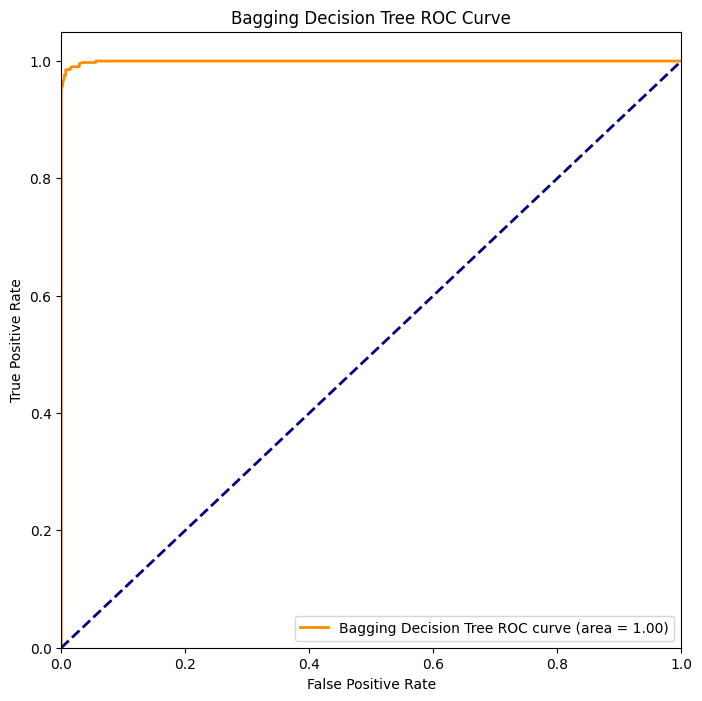

In [ ]:
# Bagging Decision Tree
bagging_pred_proba = bagging_model.predict_proba(test_embeddings)[:, 1]
roc_auc_bagging = roc_auc_score(test_labels, bagging_pred_proba)
print(f'Bagging Decision Tree ROC-AUC: {roc_auc_bagging:.2f}')
plot_roc_auc(test_labels, bagging_pred_proba, 'Bagging Decision Tree')

Boosted Decision Tree ROC-AUC: 0.96


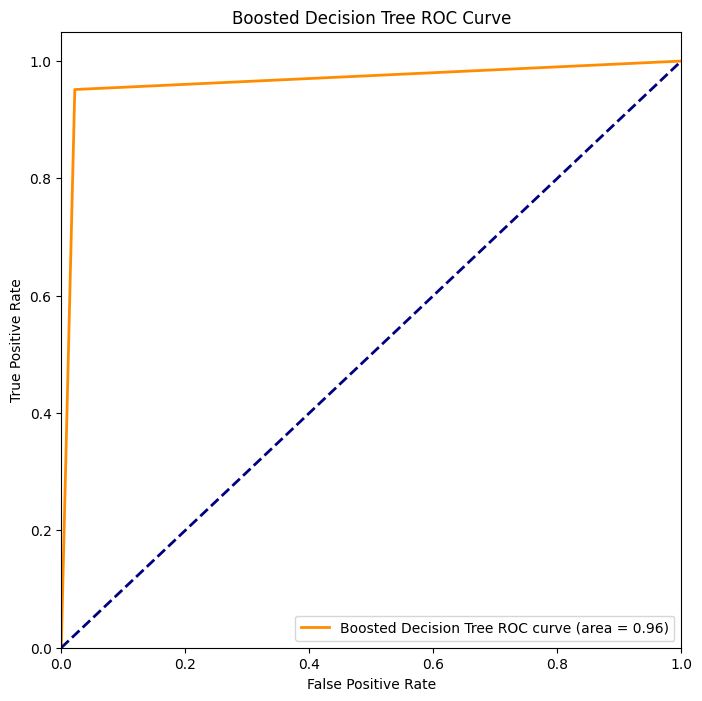

In [ ]:
# Boosted Decision Tree
boosting_pred_proba = boosting_model.predict_proba(test_embeddings)[:, 1]
roc_auc_boosting = roc_auc_score(test_labels, boosting_pred_proba)
print(f'Boosted Decision Tree ROC-AUC: {roc_auc_boosting:.2f}')
plot_roc_auc(test_labels, boosting_pred_proba, 'Boosted Decision Tree')

Random Forest ROC-AUC: 1.00


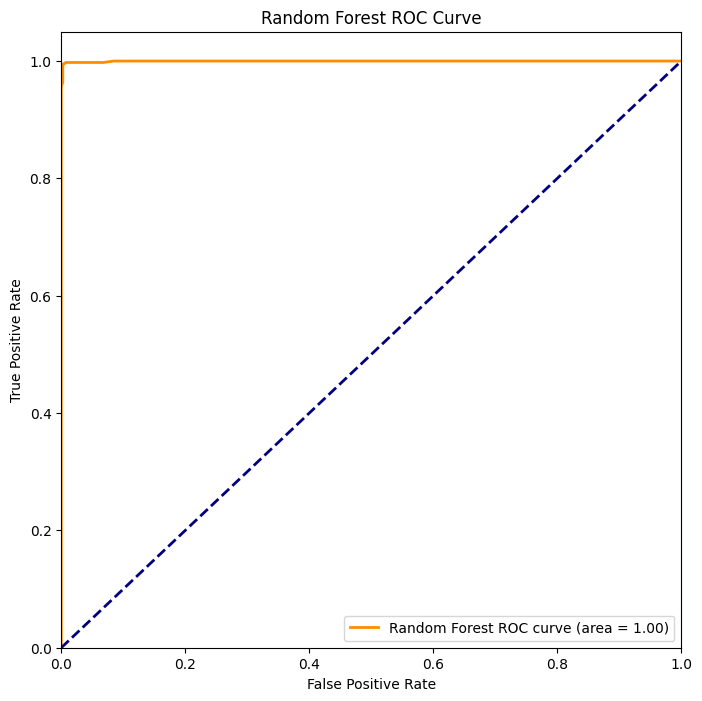

In [ ]:
# Random Forest
rf_pred_proba = rf_model.predict_proba(test_embeddings)[:, 1]
roc_auc_rf = roc_auc_score(test_labels, rf_pred_proba)
print(f'Random Forest ROC-AUC: {roc_auc_rf:.2f}')
plot_roc_auc(test_labels, rf_pred_proba, 'Random Forest')

Voting Classification ROC-AUC: 1.00


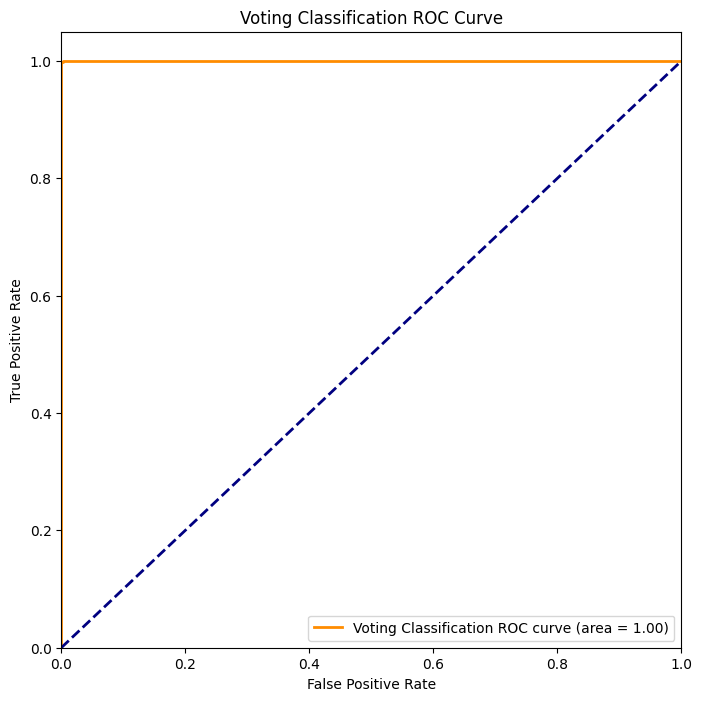

In [ ]:
# Support Vector Machine
svm_model = make_pipeline(StandardScaler(), SVC(probability=True))  # Set probability=True

# Ensemble model (Voting Classifier with Bagging)
voting_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('svm', svm_model),
    ('bagging_tree', bagging_tree_model)
], voting='soft')  # Keep 'soft' for probability estimates

# Train and evaluate the ensemble model
voting_model.fit(train_embeddings, train_labels)
voting_pred_proba = voting_model.predict_proba(test_embeddings)[:, 1]
roc_auc_voting = roc_auc_score(test_labels, voting_pred_proba)
print(f'Voting Classification ROC-AUC: {roc_auc_voting:.2f}')
plot_roc_auc(test_labels, voting_pred_proba, 'Voting Classification')
